# 1) Undirected Graphs

In [1]:
import networkx as nx

G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Milan', 'Paris'), ('Paris', 'Dublin'), ('Milan', 'Rome')]

G.add_nodes_from(V)
G.add_edges_from(E)

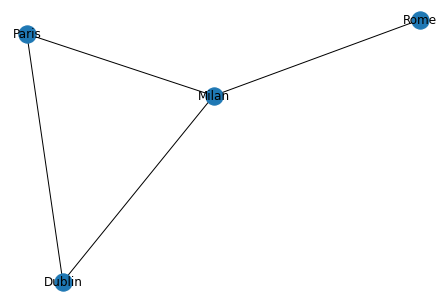

In [2]:
nx.draw(G, with_labels=True)

In [3]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Paris', 'Milan', 'Rome']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')]


In [4]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree of nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbours for nodes { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree of nodes: {'Dublin': 2, 'Paris': 2, 'Milan': 3, 'Rome': 1}
Neighbours for nodes {'Dublin': ['Milan', 'Paris'], 'Paris': ['Milan', 'Dublin'], 'Milan': ['Dublin', 'Paris', 'Rome'], 'Rome': ['Milan']}


In [5]:
ego_graph_milan = nx.ego_graph(G, "Milan")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Dublin', 'Paris', 'Milan', 'Rome']
Edges: [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')]


In [6]:
# Add new nodes and edges
new_nodes = {'London', 'Madrid'}
new_edges = {('London', 'Rome'), ('Madrid', 'Paris')}
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Paris', 'Milan', 'Rome', 'London', 'Madrid']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Paris', 'Madrid'), ('Milan', 'Rome'), ('Rome', 'London')]


In [7]:
node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Paris', 'Milan', 'Rome']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')]


The above also automatically removes edges that contain the removed nodes from the edge list.

In [8]:
node_edges = [('Milan', 'Dublin'), ('Milan', 'Paris')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Paris', 'Milan', 'Rome']
E = [('Dublin', 'Paris'), ('Milan', 'Rome')]


# 2) Directed Edges

-  (v<sub>k</sub>, v<sub>w</sub>) means node v<sub>k</sub> goes into v<sub>w</sub>, which is different from (v<sub>w</sub>, v<sub>k</sub>)
-  (v<sub>w</sub>, v<sub>k</sub>) means node v<sub>w</sub> will go into v<sub>k</sub>.
    -  v<sub>w</sub> is called the *head*
    -  v<sub>k</sub> is called the *tail*
  
-  **Indegree**: Number of heads adjacent to head end of v. *deg*<sup>-</sup>(v)
    -  Number of edges going inwards to a node
-  **OutDegree**: Number of tail ends adjacent to v. *deg*<sup>+</sup>(v)
    -  Number of edges going outwards from a node

In [9]:
G = nx.DiGraph() # for directed graphs
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Paris', 'Milan'), ('Paris', 'Dublin'), ('Milan', 'Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)

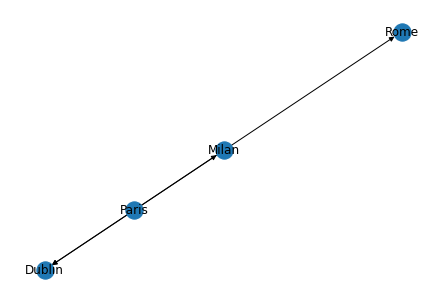

In [10]:
nx.draw(G, with_labels=True)

In [11]:
print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outdegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Paris': 0, 'Milan': 1, 'Dublin': 2, 'Rome': 1}
Outdegree for nodes: {'Paris': 2, 'Milan': 2, 'Dublin': 0, 'Rome': 0}


# Multigraph
Generalisation which allows multiple edges to have same pair of start and end nodes. 

**multigraph G** defined as `G=(V,E)` where V is a set of nodes and E is a multi-set (a set allowing multiple instances for each of its elements) of edges. This can be a **directed multigraph** if E is a multi-set of ordered couples, otherwise is **undirected multigraph** if E is a multi-set of two-sets.

In [12]:
directed_multi_graph = nx.MultiDiGraph()
undirected_multi_graph = nx.MultiGraph()
v = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Milan', 'Dublin'), ('Paris', 'Milan'), ('Paris', 'Dublin'), ('Milan', 'Rome'), ('Milan', 'Rome')]
directed_multi_graph.add_nodes_from(V)
undirected_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)
undirected_multi_graph.add_edges_from(E)

[0, 1, 0, 0, 0, 1]

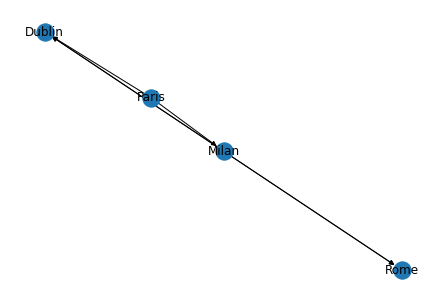

In [13]:
nx.draw(directed_multi_graph, with_labels=True)

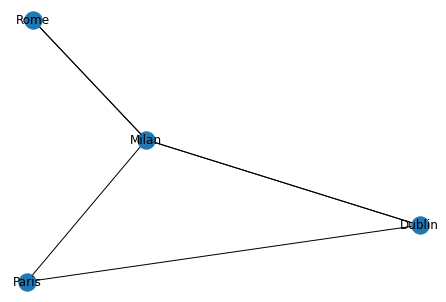

In [14]:
nx.draw(undirected_multi_graph, with_labels=True)

## Weighted Edges

-  **edge-weighted graph** (weighted graph) G is defined as *G=(V,E,w)* where V is a set of nodes, E is a set of edges, and w:E -> ${\rm I\!R}$ is a weighted function that assigns at each edge e $ \in $ E a weight expressed as a real number.
-  **node-weighted graph** G is defined as *G=(V,E,w)* where V is a set of nodes, E is a set of edges and w:V -> ${\rm I\!R}$ is the weighted function that assigns each node v $ \in $ V a weight expressed as a real number.

Note:
-  If E is a set of ordered couples, then we call it a **directed weighted graph**
-  If E is a set of two-sets, then we call it a **undirected weighted graph**
-  If E is a multi-set, then we call it a **weighted multigraph (directed weighted multigraph)**
-  If E is a multi-set of ordered couples, it is an **undirected weighted multigraph**

In [15]:
# Generate a directed weighted graph
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin', 19), ('Paris', 'Milan', 8), ('Paris', 'Dublin', 11), ('Milan', 'Rome', 5)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

{('Paris', 'Milan'): Text(0.19273389398664845, 0.15608912385920556, '8'),
 ('Paris', 'Dublin'): Text(0.46657745148658714, 0.3687465603636546, '11'),
 ('Milan', 'Dublin'): Text(0.34068865452676417, 0.2580370152390075, '19'),
 ('Milan', 'Rome'): Text(-0.46657745148658725, -0.3687465603636545, '5')}

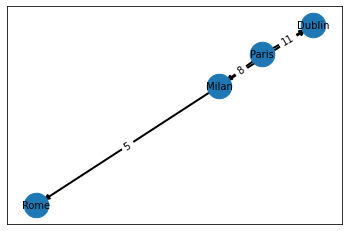

In [16]:
pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

nx.draw_networkx_nodes(G, pos, node_size=600)
nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=2)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

### Bipartite Graphs

In [17]:
import pandas as pd
import numpy as np

n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 == 0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 == 1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),
    np.random.choice(top_nodes, n_edges)
)
edges = pd.DataFrame([{"source": a, "target": b} for a, b in iter_edges])
display(edges.sample(2))

B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

,source,target
2,8,1
0,6,7


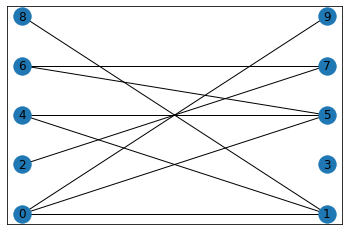

In [19]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

### Representing Edges

In [20]:
nx.to_pandas_adjacency(G) # adjacency matrix as pandas dataframe

,Paris,Milan,Dublin,Rome
Paris,0.0,8.0,11.0,0.0
Milan,0.0,0.0,19.0,5.0
Dublin,0.0,0.0,0.0,0.0
Rome,0.0,0.0,0.0,0.0


In [24]:
nx.to_numpy_matrix(G) # adjacency matrix as numpy matrix; same order as G.nodes list

matrix([[ 0.,  8., 11.,  0.],
        [ 0.,  0., 19.,  5.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]])

In [27]:
nx.to_pandas_edgelist(G)

,source,target,weight
0,Paris,Milan,8
1,Paris,Dublin,11
2,Milan,Dublin,19
3,Milan,Rome,5


In [28]:
nx.to_dict_of_dicts(G)

{'Paris': {'Milan': {'weight': 8}, 'Dublin': {'weight': 11}},
 'Milan': {'Dublin': {'weight': 19}, 'Rome': {'weight': 5}},
 'Dublin': {},
 'Rome': {}}

In [29]:
nx.to_numpy_array(G)

array([[ 0.,  8., 11.,  0.],
       [ 0.,  0., 19.,  5.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

### Plotting Graphs

In [35]:
def draw_graph(G, nodes_position, weight):
    nx.draw(G, nodes_position, with_labels=True, font_size=15, node_size=400, edge_color='gray', arrowsize=30)
    if weight:
        edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, nodes_position, edge_labels=edge_labels)

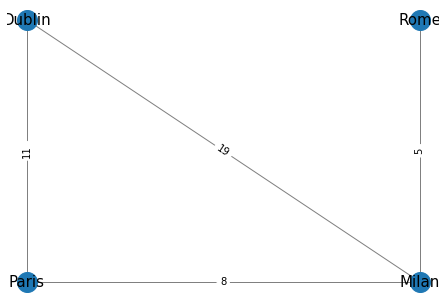

In [36]:
G = nx.Graph()
V = {'Paris', 'Dublin', 'Milan', 'Rome'}
E = [('Paris', 'Dublin', 11), ('Paris', 'Milan', 8), ('Milan', 'Rome', 5), ('Milan', 'Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
node_position = {'Paris': [0,0], 'Dublin': [0,1], 'Milan':[1,0], 'Rome':[1,1]}
draw_graph(G, node_position, True)

There are several different node positions:
-  nx.circular_layout(), bipartite_layout(), kamada_kawai_layout(), etc..